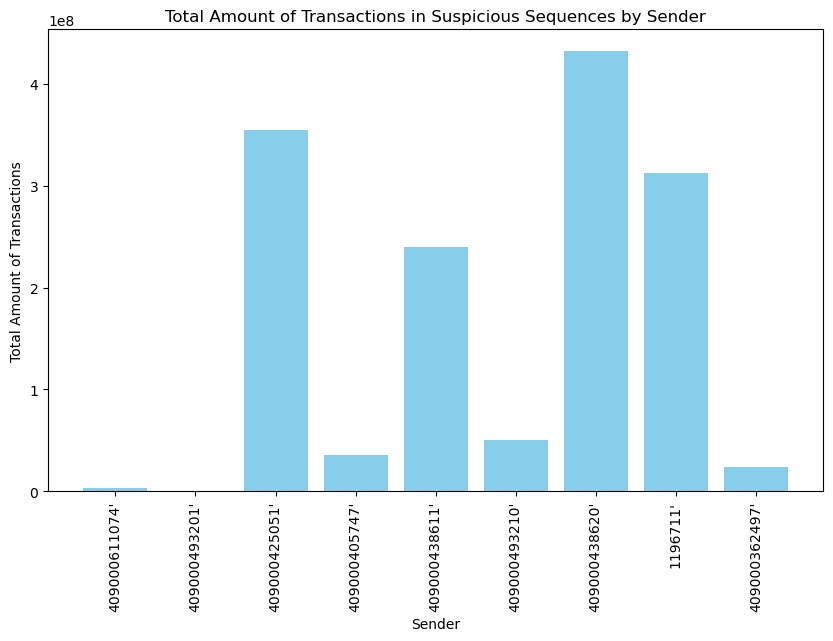

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

transaction_detail = pd.read_excel("bank.xlsx")

transaction_detail['transaction_time'] = pd.to_datetime(transaction_detail['transaction_time'])

def find_suspicious_sequences(df):
    sequences = []
    current_sequence = None
    for index, row in df.iterrows():
        if current_sequence is None or \
           (row['transaction_time'] - current_sequence['sequence_end']).total_seconds() / 3600 <= 1:
            if current_sequence is None:
                current_sequence = {'sender': row['sender'], 
                                    'sequence_start': row['transaction_time'],
                                    'sequence_end': row['transaction_time'],
                                    'transactions_count': 1,
                                    'transactions_sum': row['withdraw']}
            else:
                current_sequence['sequence_end'] = row['transaction_time']
                current_sequence['transactions_count'] += 1
                current_sequence['transactions_sum'] += row['withdraw']
        else:
            if current_sequence['transactions_count'] >= 2 and current_sequence['transactions_sum'] >= 150:
                sequences.append(current_sequence)
            current_sequence = {'sender': row['sender'], 
                                'sequence_start': row['transaction_time'],
                                'sequence_end': row['transaction_time'],
                                'transactions_count': 1,
                                'transactions_sum': row['withdraw']}
    if current_sequence is not None and current_sequence['transactions_count'] >= 2 and current_sequence['transactions_sum'] >= 150:
        sequences.append(current_sequence)
    return sequences
suspicious_sequences = find_suspicious_sequences(transaction_detail)

suspicious_df = pd.DataFrame(suspicious_sequences)

plt.figure(figsize=(10, 6))
plt.bar(suspicious_df['sender'], suspicious_df['transactions_sum'], color='skyblue')
plt.xlabel('Sender')
plt.ylabel('Total Amount of Transactions')
plt.title('Total Amount of Transactions in Suspicious Sequences by Sender')
plt.xticks(rotation=90)
plt.show()
